Student Names: Larry Chiem, Ian Rowe, Raymond Shum, Nicholas Stankovich

Working Title: Life Expectancy Predictors

### What are we going to predict?
We are attempting to predict life expectancy.

### Source of the Data Set:
This data set is from Kaggle: https://www.kaggle.com/kumarajarshi/life-expectancy-who

It describes average life expectancy values for many countries along with indicators thought to be useful for prediction.

The author has taken data available from reports provided by the GHO, preprocessed them and combined them into a single data set.

### What features are we planning to use as predictors?
TBD: We are dropping 'Country', 'Year', 'infant deaths', 'percentage expenditure', 'thinness 1-19 years', 'Income composition of resources'. 

Reason: 

Included features may depend on future feature engineering. For example, we might combine all the vaccination features into something like average vaccination rate. Population might get dropped and exist in engineered futures such as GDP per capita.

We also want to try to experiment with best predictors using RandomSearchCV if time allows.

### Purpose
We want to develop a model to predict a population's life expectancy (in years of age) based on the indicators with the highest level of contribution.

### Notes
The issue with this data set is that there is no way to guarantee its accuracy. The author mentioned that it was a preprocessed combination of several data sets provided by GHO (Global Health Observatory) of the WHO, but did not reference the original sources or methods used for transformation. 

Some features are unclear in what they represent. For example, income composition of resources is defined as a 0-1 scaled representation of income composition of resources.

Some features also contain obviously inaccurate values. For example, there is a country who's average BMI is 87. There is also a country with 19479% expenditure on healthcare (relative to GDP) and a country with 212183 reported cases of measles per 1000 population. These values seem unrealistic.

We attempt to identify and remedy errors during preprocessing. Due to the unreliable nature of the data, this project should only be used to illustrate the data science techniques we've learned in class and not to draw an real world conclusions, unfortunately.

### Data Dictionary
<br>
<dl>
    <dt>Country</dt>
    <br>
    <dt>Year</dt>
    <br>
    <dt>Status</dt>
    <dd>Developed or Developing status</dd>
    <br>
    <dt>Life Expectancy</dt>
    <dd>Life Expectancy in age</dd>
    <br>
    <dt>Adult Mortality</dt>
    <dd>Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)</dd>
    <br>
    <dt>infant deaths</dt>
    <dd>Number of Infant Deaths per 1000 population</dd>
    <br>
    <dt>Alcohol</dt>
    <dd>Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)</dd>
    <br>
    <dt>percentage expenditure</dt>
    <dd>Expenditure on health as a percentage of Gross Domestic Product per capita(%)</dd>
    <br>
    <dt>Hepatitus B</dt>
    <dd>Hepatitis B (HepB) immunization coverage among 1-year-olds (%)</dd>
    <br>
    <dt>Measles</dt>
    <dd>Measles - number of reported cases per 1000 population</dd>
    <br>
    <dt>BMI</dt>
    <dd>Average Body Mass Index of entire population</dd>
    <br>
    <dt>under-5-deaths</dt>
    <dd>Number of under-five deaths per 1000 population</dd>
    <br>
    <dt>Polio</dt>
    <dd>Polio (Pol3) immunization coverage among 1-year-olds (%)</dd>
    <br>
    <dt>Total expenditure</dt>
    <dd>General government expenditure on health as a percentage of total government expenditure (%)</dd>
    <br>
    <dt>Diptheria</dt>
    <dd>Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)</dd>
    <br>
    <dt>HIV/AIDS</dt>
    <dd>Deaths per 1 000 live births HIV/AIDS (0-4 years)</dd>
    <br>
    <dt>GDP</dt>
    <dd>Gross Domestic Product per capita (in USD)</dd>
    <br>
    <dt>Population</dt>
    <br>
    <dt>thinness 1-19 years</dt>
    <dd>Prevalence of thinness among children and adolescents for Age 10 to 19 (% )</dd>
    <br>
    <dt>thinness 5-9 years</dt>
    <dd>Prevalence of thinness among children for Age 5 to 9(%)</dd>
    <br>
    <dt>Income composition of resources</dt>
    <dd>Human Development Index in terms of income composition of resources (index ranging from 0 to 1)</dd>
    <br>
    <dt>Schooling</dt>
    <dd>Number of years of Schooling(years)</dd>
</dl>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# These are boilerplate settings provided by Prof. Memo

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the very useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('notebook')   
# sns.set_context('paper')  # smaller
# sns.set_context('talk')   # larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [3]:
# Repo is still private. Load .csv locally for now. Replace with url to dataset in repo when public.
# Make sure the .csv is in the same directory as this .ipynb.

url = "life_expectancy_data.csv"
df = pd.read_csv(url)

In [4]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# I think we can probably drop country and year. We don't want year because we aren't doing a time series regression
# and I feel that country is already described by the associated set of features in the row. 

# We might drop 'Status' for the same reasons as 'Country', but it may benefit
# from one-hot encoding. Because the status is binary (Developed and Developing),
# we can actually turn this experiment into a classification project if we
# instead choose to predict it.

# We should be able to drop thinness 5-9 because we have thinness 1-19
# We might be able to perform feature engineering to:
#    - Combine vaccination rates for overall vaccination rates
#    - Do something related to overall cases of transmissible diseases
#    - Alcohol/Total healthcare expenditure rather than liters consumed
#    - Adult mortality / infant deaths

# The features are mostly numeric, which should help for regression.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# We can immediately see many issues with the data. It seems there are several extreme outliers.
# For example, there are countries with:
#    - 723 Adult mortalities per 1000 population
#    - 1800 infant deaths per 1000 population
#    - 19479% GDP expenditure on healthcare
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<AxesSubplot:>

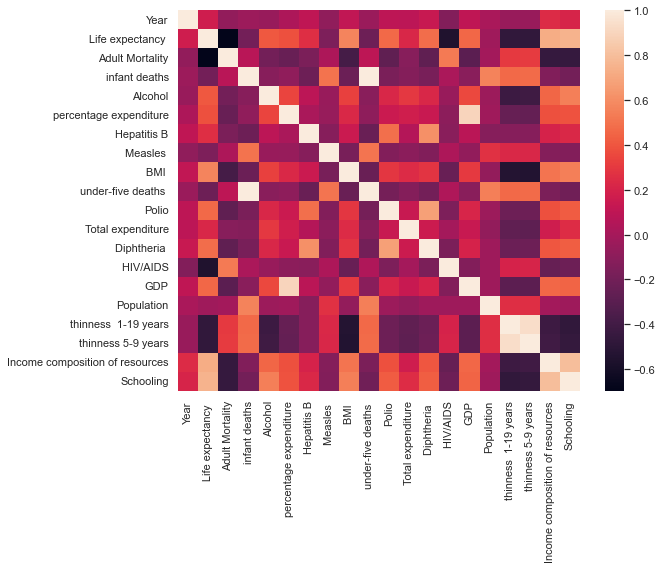

In [7]:
# Showing a general heatmap of correlation between features
corr = df.corr()
sns.heatmap(corr)

<AxesSubplot:>

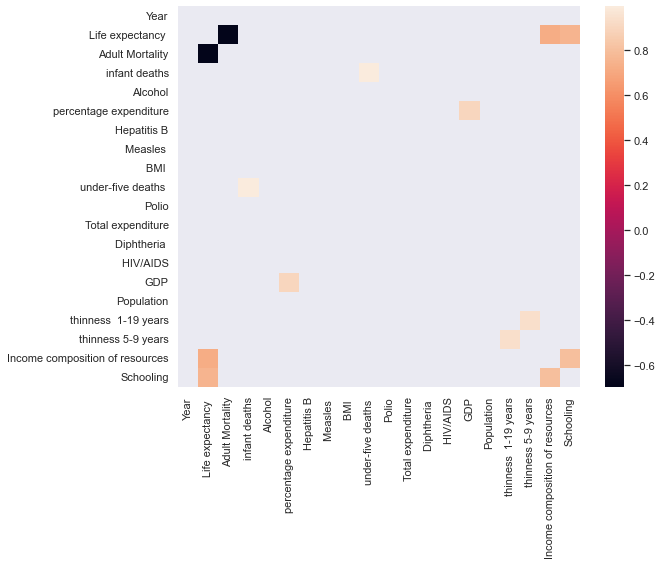

In [8]:
# The most strongly correlated features displayed in a heatmap

# Strong relationships (not including life expectancy):
#    - Income Composition of Resources & Schooling
#    - Under 5 deaths & infant deaths
#    - GDP & percent expenditure
#    - Thinness 5-9 & thinness 1-19

# I think we can drop:
#    - Income composition of resources
#    - infant deaths
#    - Thinness 5-9

# Total expenditured is not strongly correlated with either GDP or
# percentage expenditure, which is suspcious.

# Reason: We don't know what income composition of resources actually is,
# and we can lean on schooling. Infant deaths has some extreme outliers
# and the under 5 deaths outliers are at least more sensible (due to age
# range). Thinness 1-19 should already include thinness 5-9.

# Caveat: Life Expectancy is strongly correlated with income composition
# of resources

strong_relationship = corr[((corr >= .7) | (corr <= -.6)) & (corr != 1.0)]

sns.heatmap(strong_relationship)

In [9]:
# Each feature's most highly positively correlated value.
corr.apply(lambda x: x.sort_values(ascending=False).index[1])

Year                               Income composition of resources
Life expectancy                                          Schooling
Adult Mortality                                           HIV/AIDS
infant deaths                                   under-five deaths 
Alcohol                                                  Schooling
percentage expenditure                                         GDP
Hepatitis B                                            Diphtheria 
Measles                                         under-five deaths 
 BMI                                              Life expectancy 
under-five deaths                                    infant deaths
Polio                                                  Diphtheria 
Total expenditure                                          Alcohol
Diphtheria                                                   Polio
 HIV/AIDS                                          Adult Mortality
GDP                                         percentage expendi

In [10]:
# Each feature's most negatively correlated value.
corr.apply(lambda x: x.sort_values().index[0])

Year                                            HIV/AIDS
Life expectancy                          Adult Mortality
Adult Mortality                         Life expectancy 
infant deaths                                       BMI 
Alcohol                             thinness  1-19 years
percentage expenditure                thinness 5-9 years
Hepatitis B                           under-five deaths 
Measles                                             BMI 
 BMI                                  thinness 5-9 years
under-five deaths                                   BMI 
Polio                                    Adult Mortality
Total expenditure                     thinness 5-9 years
Diphtheria                               Adult Mortality
 HIV/AIDS                               Life expectancy 
GDP                                      Adult Mortality
Population                                   Hepatitis B
 thinness  1-19 years                               BMI 
 thinness 5-9 years            

In [11]:
# % missing values per numeric feature

# None of these values reach the threshhold for dropping the feature.
# However, the concern is that we cannot easily fill the gaps for some
# features. 

# For example, GDP and Population shouldn't be filled with the median
# values. They could be completely different based on the country.

# Perhaps we could fill each missing value with the median for the status
# of country(Developed, Developing)

# After discussion with Prof. Memo, we decided that we'll try to fill
# missing values with KNN imputer, first.

numeric = df.drop(columns=['Country','Year','Status'])

((numeric.isna().sum() / len(numeric)) * 100).round(2)

Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                       0.00
Alcohol                             6.60
percentage expenditure              0.00
Hepatitis B                        18.82
Measles                             0.00
 BMI                                1.16
under-five deaths                   0.00
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
 HIV/AIDS                           0.00
GDP                                15.25
Population                         22.19
 thinness  1-19 years               1.16
 thinness 5-9 years                 1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [12]:
# For our preliminary exploration, we will just drop the rows containing null values.
numeric = numeric.dropna()

{'tags': ['hide-output']}

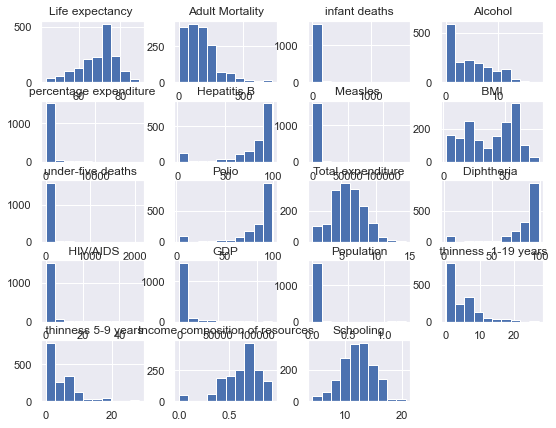

In [13]:
# This is a histogram plot of each numeric feature. We can see that
# many features have values distributed around the smallest or largest
# measurements (such as under-five deaths and thinness 1-19 years). We 
# can also see that many features (such as Polio and thinness) have 
# ouliers. 

# Consider that describe() also shows that some features have values
# that are very large (like population) and some that can be very
# small (min Hepatitus B is 1.0).

# Our data set would probably benefit from z-score normalization.

numeric.hist()

{"tags": ["hide-output"]}

In [14]:
# For now, we are not normalizing or dropping any features. We're
# going to train a KNNRegressors model using raw, unscaled data
# and all of the numeric features to establish a baseline RMSE. For
# the project, we will judge the accuracy of our tuned model against
# the baseline.

target = 'Life expectancy '
predictors = numeric.drop(columns=target).columns

X = numeric[predictors].values
y = numeric[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [15]:
# (raw and unscaled) Blind vs test RMSE
# Does this means +- 8.7 or 8.9 years?

def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

baseline = rmse(y_train.mean(), y_test).round(1)
print(f"test RMSE, raw and unscaled baseline: {baseline}")

raw = rmse(predictions, y_test).round(1)
print(f"test RMSE, raw and unscaled data: {raw}")

test RMSE, raw and unscaled baseline: 8.9
test RMSE, raw and unscaled data: 8.7


In [16]:
# preliminary hyperparameter tuning example
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

params = {'n_neighbors' : range(1,21,2),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
optimized_knn = GridSearchCV(knn, params, n_jobs=-1)
optimized_knn.fit(X_train, y_train)

print(f"Best KNN Hyperparameters: {optimized_knn.best_params_}")

Best KNN Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [17]:
opt_predict = optimized_knn.predict(X_test)
opt = rmse(opt_predict, y_test).round(1)
print(f"optimized test RMSE, raw and unscaled data: {opt}")

optimized test RMSE, raw and unscaled data: 8.5


### LInear Regression Test

In [18]:
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
# remove whitespace from columns
df_lr = df.copy(deep=True)

for column in df_lr.columns:
    df_lr.rename(columns={column: column.strip().lower()}, errors='raise',inplace=True)

In [20]:
# find way to replace na
df_lr.dropna(inplace=True)


In [21]:
y = df_lr['life expectancy']
X = df_lr.drop(columns=['country','year','status','life expectancy'])

X = zscore(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
regr.score(X_train,y_train)

0.8312037705809626

In [24]:
predicted = regr.predict(X_test)

<AxesSubplot:ylabel='life expectancy'>

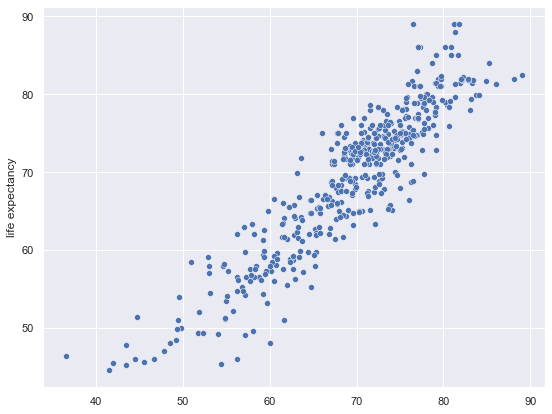

In [25]:
sns.scatterplot(x=predicted,y=y_test)

In [26]:
np.sqrt(((y_test - regr.predict(X_test))**2).mean()).round(2)

3.64

In [27]:
print(f'intercept: {regr.intercept_:.2f}')
for i, coef in enumerate(regr.coef_):
    print(f'  {X.columns[i]}: {coef:.2f}')

intercept: 69.29
  adult mortality: -2.17
  infant deaths: 9.27
  alcohol: -0.28
  percentage expenditure: 0.81
  hepatitis b: -0.04
  measles: -0.02
  bmi: 0.91
  under-five deaths: -9.48
  polio: 0.14
  total expenditure: 0.14
  diphtheria: 0.31
  hiv/aids: -2.61
  gdp: 0.06
  population: -0.02
  thinness  1-19 years: 0.06
  thinness 5-9 years: -0.13
  income composition of resources: 1.66
  schooling: 2.59


In [28]:
# Attempt at forward feature selection
print("RMSE of first feature: ")

for i in range(X_train.shape[1]):
    X_feat = X_train.iloc[:,[i]]
    scores = cross_val_score(LinearRegression(), X_feat, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-scores.mean())

    print(f'  {X_train.columns[i]}: {rmse:.2f}')

RMSE of first feature: 
  adult mortality: 6.17
  infant deaths: 8.55
  alcohol: 7.98
  percentage expenditure: 7.99
  hepatitis b: 8.46
  measles: 8.69
  bmi: 7.15
  under-five deaths: 8.51
  polio: 8.20
  total expenditure: 8.55
  diphtheria: 8.18
  hiv/aids: 7.10
  gdp: 7.87
  population: 8.69
  thinness  1-19 years: 7.74
  thinness 5-9 years: 7.75
  income composition of resources: 6.16
  schooling: 5.96


In [29]:
# Attempt at forward feature selection

remaining = list(range(X_train.shape[1]))
selected = []
n = 18
while len(selected) < n:
    # find the single features that works best in conjunction
    # with the already selected features
    rmse_min = 1e7
    for i in remaining:
        X_feat = np.hstack((
            X_train.iloc[:,selected], 
            X_train.iloc[:,[i]]))
        scores = cross_val_score(
            LinearRegression(), 
            X_feat, 
            y_train, 
            scoring='neg_mean_squared_error', 
            cv=5)
        rmse = np.sqrt(-scores.mean())
        if(rmse < rmse_min):
            rmse_min = rmse
            i_min = i
    remaining.remove(i_min)
    selected.append(i_min)
    print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))

num features: 1; rmse: 5.96
num features: 2; rmse: 4.56
num features: 3; rmse: 4.04
num features: 4; rmse: 3.86
num features: 5; rmse: 3.78
num features: 6; rmse: 3.74
num features: 7; rmse: 3.71
num features: 8; rmse: 3.70
num features: 9; rmse: 3.69
num features: 10; rmse: 3.63
num features: 11; rmse: 3.63
num features: 12; rmse: 3.63
num features: 13; rmse: 3.63
num features: 14; rmse: 3.64
num features: 15; rmse: 3.64
num features: 16; rmse: 3.65
num features: 17; rmse: 3.65
num features: 18; rmse: 3.66


In [30]:
print("Top 10 features: ")
for i in selected[:10]:
    print(X_train.columns[i])

Top 10 features: 
schooling
adult mortality
hiv/aids
income composition of resources
bmi
percentage expenditure
diphtheria
alcohol
under-five deaths
infant deaths


In [31]:
# polynomial features
predictors = ['schooling', 'adult mortality', 'hiv/aids', 'income composition of resources', 'bmi']
X = df_lr[predictors]
y = df_lr['life expectancy']
pf = PolynomialFeatures(degree=3)
pf.fit(X)
X_poly=pf.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)
regr = LinearRegression()
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)

In [32]:
rmse = np.sqrt(((y_test - regr.predict(X_test))**2).mean())
r2 = regr.score(X_train, y_train)
print(f'training rsquared:{r2:.2f}')
print(f'rmse:{rmse:.2f}')

training rsquared:0.92
rmse:2.50


### Imputer Test

In [33]:
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import KNNImputer

In [34]:
df_lr2 = df.copy(deep=True)

for column in df_lr2.columns:
    df_lr2.rename(columns={column: column.strip().lower()}, errors='raise',inplace=True)

In [35]:
df_lr2.drop(columns=['country','year','status'],inplace=True)

In [36]:
imputer = KNNImputer(n_neighbors=2)
df_lr2 = pd.DataFrame(data=imputer.fit_transform(df_lr2), columns=df_lr2.columns )

In [37]:
y = df_lr2['life expectancy']
X = df_lr2.drop(columns=['life expectancy'])
X = zscore(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [38]:
predicted = regr.predict(X_test)

r2 = regr.score(X_train,y_train)
rmse = np.sqrt(((y_test - regr.predict(X_test))**2).mean()).round(2)

print(f'r2 = {r2:.2f}\nrmse= {rmse:.2f}')

r2 = 0.83
rmse= 3.94


<AxesSubplot:ylabel='life expectancy'>

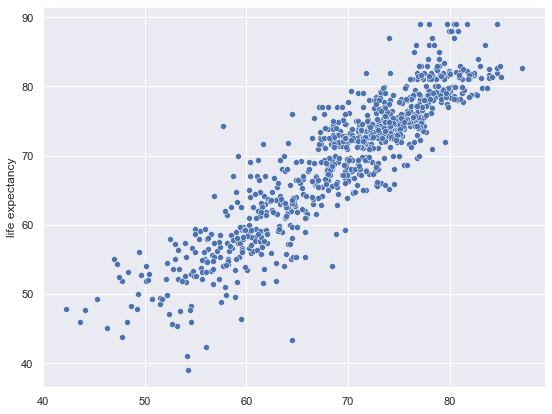

In [39]:
sns.scatterplot(x=predicted,y=y_test)

#### Decision Tree Test

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [122]:
df_dt = df.copy(deep=True)

for column in df_dt.columns:
    df_dt.rename(columns={column: column.strip().lower()}, errors='raise',inplace=True)

In [123]:
df_dt.drop(columns=['country','year','status'],inplace=True)
imputer = KNNImputer(n_neighbors=5)
df_dt = pd.DataFrame(data=imputer.fit_transform(df_dt), columns=df_dt.columns )

In [124]:
y = df_dt['life expectancy']
X = df_dt.drop(columns=['life expectancy'])

# robust scaler
from sklearn.preprocessing import RobustScaler
X = pd.DataFrame(RobustScaler().fit_transform(X), columns=X.columns, index=X.index)

In [125]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

rmse_scores = []

for i in range(1, 20):
    # train the model
    reg = DecisionTreeRegressor(max_depth=i)
    reg.fit(X_train, y_train)

    # make predictions and compute error
    y_predict = reg.predict(X_test)
    errors = y_test - y_predict
    rmse = np.sqrt((errors**2).mean())
    rmse_scores.append(rmse)

In [126]:
print(np.argmin(rmse_scores), np.min(rmse_scores))

7 2.7340824748422214


In [127]:
X.describe()

,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.135222,1.241089,0.124847,1.541353,-0.491858,6.669236,-0.132023,1.358419,-0.549712,0.061212,-0.560868,2.345862,1.041011,1.306564,0.260213,0.265453,-0.169989,-0.083228
std,0.811390,5.360296,0.607747,4.550579,1.154368,31.831430,0.544359,5.730198,1.230190,0.789697,1.245304,7.253978,2.717258,7.136425,0.786419,0.802081,0.731194,0.792201
min,-0.934641,-0.136364,-0.576791,-0.148594,-4.411765,-0.047189,-1.147139,-0.142857,-4.736842,-1.748172,-4.789474,0.000000,-0.334216,-0.252762,-0.589286,-0.589286,-2.364912,-2.928571
25%,-0.457516,-0.136364,-0.420146,-0.137868,-0.754902,-0.047189,-0.645777,-0.142857,-0.789474,-0.458164,-0.789474,0.000000,-0.240452,-0.206134,-0.321429,-0.321429,-0.642105,-0.547619
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.542484,0.863636,0.579854,0.862132,0.245098,0.952811,0.354223,0.857143,0.210526,0.541836,0.210526,1.000000,0.759548,0.793866,0.678571,0.678571,0.357895,0.452381
max,3.784314,81.681818,2.159326,44.443292,0.392157,588.941013,1.204360,89.142857,0.315789,3.850528,0.315789,72.142857,23.927749,166.245485,4.339286,4.500000,0.961404,2.000000


<AxesSubplot:>

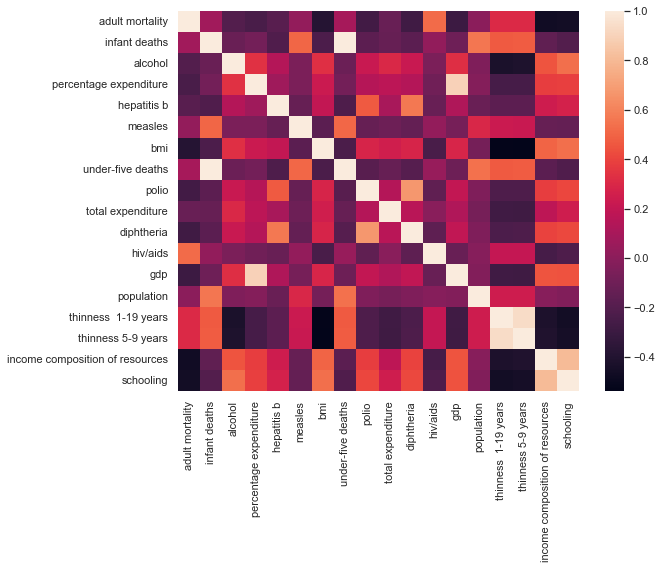

In [134]:
sns.heatmap(X.corr())